 **Data Preprocessing for three datasets**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset1.csv to dataset1.csv


In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import wordcloud

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
data1 = pd.read_csv("dataset1.csv") 
data2 = pd.read_csv("hate_speech.csv") 
data3 = pd.read_csv("train.csv") 

In [ ]:
data1.drop(columns = 'Unnamed: 0',inplace=True)
data1.drop(columns = {'count', 'hate_speech', 'offensive_language','neither'},inplace = True)
data1.rename(columns = {'tweet' : 'text', 'class' : 'label'},inplace= True)
data2.drop(columns = 'Unnamed: 0',inplace=True)
data3.drop(columns = {'id','severe_toxic','obscene','threat','insult','identity_hate'},inplace=True)
data3.rename(columns = {'comment_text': 'text', 'toxic':'label'}, inplace = True)

In [ ]:
data1['label'].replace(0, 1, inplace=True)
data1['label'].replace(2, 0, inplace=True)

In [ ]:
data1.label.value_counts()

1    20620
0    4163 
Name: label, dtype: int64

In [ ]:
from sklearn.utils import shuffle
data2 = shuffle(data2)
data2.reset_index(drop=True, inplace = True)

In [ ]:
# remove puctunations, https
import re
def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df


In [ ]:
data1 = clean_text(data1, 'text')
data2 = clean_text(data2, 'text')
data3 = clean_text(data3, 'text')

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
data1['text'] = data1['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
data2['text'] = data2['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
data3['text'] = data3['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

In [ ]:
df1 = data1['text']
df2 = data2['text']
df3 = data3['text']
merge_text = pd.concat([df1, df2, df3], ignore_index=True)

# Basic NLP

In [ ]:
from collections import Counter

#count unique words
def counter_word(text):
    count = Counter()
    for i in text.values:
        for word in i.split():
            count[word]+=1
    return count

In [ ]:
counter = counter_word(merge_text)

In [ ]:
counter

Counter({'rt': 1152,
         'woman': 966,
         'shouldnt': 1544,
         'complain': 426,
         'cleaning': 270,
         'house': 1560,
         'amp': 837,
         'man': 3642,
         'always': 4410,
         'take': 8795,
         'trash': 1332,
         'boy': 1238,
         'dats': 26,
         'coldtyga': 1,
         'dwn': 3,
         'bad': 4317,
         'cuffin': 10,
         'dat': 363,
         'hoe': 1881,
         '1st': 432,
         'place': 6738,
         'dawg': 62,
         'ever': 4365,
         'fuck': 9856,
         'bitch': 9454,
         'start': 3372,
         'cry': 293,
         'confused': 782,
         'shit': 4796,
         'ganderson': 1,
         'based': 3172,
         'look': 9260,
         'like': 33429,
         'tranny': 60,
         'hear': 1229,
         'might': 6892,
         'true': 3675,
         'faker': 4,
         'told': 2035,
         'ya': 1088,
         '57361': 1,
         'madisonx': 2,
         'blows': 45,
         'mec

In [ ]:
len(counter)

310262

In [ ]:
# the size of dictionary
num_words = len(counter)

#max number of words in a sequence
max_length = 20

**train/test split**

In [ ]:
train_size1 = int(data1.shape[0] * 0.8)
train_size2 = int(data2.shape[0] * 0.8)
train_size3 = int(data3.shape[0] * 0.8)
#train2 = int(data2.shape[0] * 0.5)
#train_size2 = int(data2.shape[0] * 0.5 * 0.8)
#train3 = int(data3.shape[0] * 0.1)
#train_size3 = int(data3.shape[0] * 0.1 * 0.8)

train1_sentences = data1.text[:train_size1]
train1_labels = data1['label'][:train_size1]
test1_sentences = data1.text[train_size1:]
test1_labels = data1['label'][train_size1:]

train2_sentences = data2.text[:train_size2]
train2_labels = data2['label'][:train_size2]
test2_sentences = data2.text[train_size2:]
test2_labels = data2['label'][train_size2:]

train3_sentences = data3.text[:train_size3]
train3_labels = data3['label'][:train_size3]
test3_sentences = data3.text[train_size3:]
test3_labels = data3['label'][train_size3:]

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=num_words)
#tokenizer.fit_on_texts(train1_sentences)
#tokenizer.fit_on_texts(train2_sentences)
tokenizer.fit_on_texts(train3_sentences)

word_index = tokenizer.word_index

train1_sequences = tokenizer.texts_to_sequences(train1_sentences)
test1_sequences = tokenizer.texts_to_sequences(test1_sentences)

train2_sequences = tokenizer.texts_to_sequences(train2_sentences)
test2_sequences = tokenizer.texts_to_sequences(test2_sentences)

train3_sequences = tokenizer.texts_to_sequences(train3_sentences)
test3_sequences = tokenizer.texts_to_sequences(test3_sentences)

train1_padded = pad_sequences(
    train1_sequences,maxlen = max_length, padding = "post", truncating = "post")
test1_padded = pad_sequences(
    test1_sequences,maxlen = max_length, padding = "post", truncating = "post")

train2_padded = pad_sequences(
    train2_sequences,maxlen = max_length, padding = "post", truncating = "post")
test2_padded = pad_sequences(
    test2_sequences,maxlen = max_length, padding = "post", truncating = "post")

train3_padded = pad_sequences(
    train3_sequences,maxlen = max_length, padding = "post", truncating = "post")
test3_padded = pad_sequences(
    test3_sequences,maxlen = max_length, padding = "post", truncating = "post")

Using TensorFlow backend.


In [ ]:
print(data1.text[1])
print(train1_sequences[1])
print(data2.text[1])
print(train2_sequences[1])
print(data3.text[1])
print(train3_sequences[1])

rt boy dats coldtyga dwn bad cuffin dat hoe 1st place
[9144, 1013, 62999, 195805, 249, 8555, 15354, 2233, 93]
sharpton wants get hands da white house fleet limousines
[32788, 830, 22, 1801, 2697, 558, 868, 6817]
daww matches background colour im seemingly stuck thanks talk 2151 january 11 2016 utc
[89359, 2353, 1318, 3357, 14, 4258, 2360, 26, 4, 33814, 811, 1020, 8055, 216]


# check inverse

In [ ]:
reverse_word_index = dict([value,key] for (key,value) in word_index.items())

In [ ]:
def decode(text):
    return " ".join([reverse_word_index.get(i,"?") for i in text])

In [ ]:
decode(train1_sequences[0])

'rt woman shouldnt complain cleaning house amp man always take trash'

In [ ]:
train1_padded.shape


(19826, 20)

In [ ]:
test1_padded.shape

(4957, 20)

build model

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from keras.initializers import Constant
from keras.optimizers import Adam

model = Sequential()

model.add(Embedding(num_words, 32, input_length = max_length))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(1,activation = "sigmoid"))

optimizer = Adam(learning_rate = 3e-4)

model.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics = ["accuracy"])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 32)            9928384   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               49664     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 9,978,177
Trainable params: 9,978,177
Non-trainable params: 0
_________________________________________________________________


**train on dataset3**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.callbacks import ReduceLROnPlateau
batch_size = 32

earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

history = model.fit(train3_padded, train3_labels, batch_size=batch_size, epochs=20, verbose=1, callbacks=[earlyStopping, mcp_save, reduce_lr_loss], validation_split=0.25,)

Train on 95742 samples, validate on 31914 samples
Epoch 1/20
95742/95742 [==============================] - 406s 4ms/step - loss: 0.1707 - accuracy: 0.9438 - val_loss: 0.1328 - val_accuracy: 0.9548
Epoch 2/20
95742/95742 [==============================] - 401s 4ms/step - loss: 0.0892 - accuracy: 0.9681 - val_loss: 0.1321 - val_accuracy: 0.9549
Epoch 3/20
95742/95742 [==============================] - 392s 4ms/step - loss: 0.0600 - accuracy: 0.9788 - val_loss: 0.1723 - val_accuracy: 0.9522
Epoch 4/20
95742/95742 [==============================] - 390s 4ms/step - loss: 0.0411 - accuracy: 0.9857 - val_loss: 0.1994 - val_accuracy: 0.9464
Epoch 5/20
95742/95742 [==============================] - 394s 4ms/step - loss: 0.0274 - accuracy: 0.9907 - val_loss: 0.2233 - val_accuracy: 0.9365
Epoch 6/20
95742/95742 [==============================] - 395s 4ms/step - loss: 0.0188 - accuracy: 0.9945 - val_loss: 0.2299 - val_accuracy: 0.9409
Epoch 7/20
95742/95742 [==============================] - 392s

In [ ]:
# summarize the performance of the fit model
def summarize_model(model, history, trainX, trainy, testX, testy):
  _,train_acc = model.evaluate(trainX,trainy, verbose=0)
  _,test_acc = model.evaluate(trainX,trainy, verbose = 0)
  print('Train: %.3f, Test: %.3f' %(train_acc, test_acc))
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

Train: 0.983, Test: 0.983


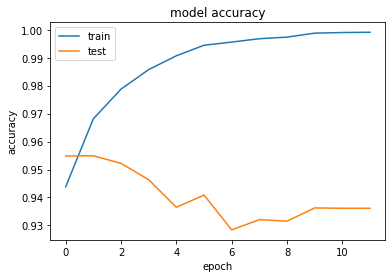

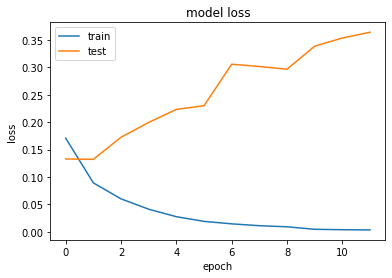

In [ ]:
summarize_model(model, history, train3_padded, train3_labels, test3_padded, test3_labels)

In [ ]:
def classification_report(testX, testy):
  # predict crisp classes for test set
  yhat_classes = model.predict_classes(testX, verbose=0)
  from sklearn.metrics import classification_report
  target_names =  ['class 0', 'class 1']
  print(classification_report(testy, yhat_classes, target_names=target_names, digits = 4))


In [ ]:
classification_report(test3_padded, test3_labels)

              precision    recall  f1-score   support

     class 0     0.9609    0.9781    0.9694     28878
     class 1     0.7494    0.6213    0.6794      3037

    accuracy                         0.9442     31915
   macro avg     0.8551    0.7997    0.8244     31915
weighted avg     0.9408    0.9442    0.9418     31915



In [ ]:
model.save('model.h5')

**Fine tune**

In [ ]:
from keras.models import load_model
# load and re-fit model on a training dataset
def fit_model(trainX, trainy):
	# load model
	model = load_model('model.h5')
	# compile model
	model.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics = ["accuracy"])
	# re-fit model
	history = model.fit(trainX, trainy, batch_size=batch_size, epochs=10, verbose=1, callbacks=[earlyStopping, mcp_save, reduce_lr_loss], validation_split=0.25,)
	return model, history

**Fix first two layers**

In [ ]:
from keras.models import load_model
# load and re-fit model on a training dataset
def fix_layer(trainX, trainy):
  # load model
  model = load_model('model.h5')
  # compile model
  model.compile(loss = "binary_crossentropy", optimizer = Adam(learning_rate = 3e-4), metrics = ["accuracy"])
  # fix the first two layers
  model.layers[0].trainable = False
  model.layers[1].trainable = False
  # re-fit model
  history = model.fit(trainX, trainy, batch_size=batch_size, epochs=10, verbose=0, callbacks=[earlyStopping, mcp_save, reduce_lr_loss], validation_split=0.25,)
  return model, history

**fine-tune on dataset1**

In [ ]:
model, history = fit_model(train1_padded, train1_labels)

Train on 14869 samples, validate on 4957 samples
Epoch 1/10
14869/14869 [==============================] - 52s 4ms/step - loss: 0.3650 - accuracy: 0.8638 - val_loss: 0.2750 - val_accuracy: 0.8751
Epoch 2/10
14869/14869 [==============================] - 51s 3ms/step - loss: 0.2679 - accuracy: 0.8818 - val_loss: 0.2524 - val_accuracy: 0.8844
Epoch 3/10
14869/14869 [==============================] - 52s 3ms/step - loss: 0.2438 - accuracy: 0.8915 - val_loss: 0.2318 - val_accuracy: 0.8935
Epoch 4/10
14869/14869 [==============================] - 51s 3ms/step - loss: 0.2227 - accuracy: 0.9015 - val_loss: 0.2143 - val_accuracy: 0.9030
Epoch 5/10
14869/14869 [==============================] - 51s 3ms/step - loss: 0.2050 - accuracy: 0.9083 - val_loss: 0.1990 - val_accuracy: 0.9106
Epoch 6/10
14869/14869 [==============================] - 52s 3ms/step - loss: 0.1901 - accuracy: 0.9143 - val_loss: 0.1871 - val_accuracy: 0.9191
Epoch 7/10
14869/14869 [==============================] - 52s 3ms/ste

Train: 0.936, Test: 0.936


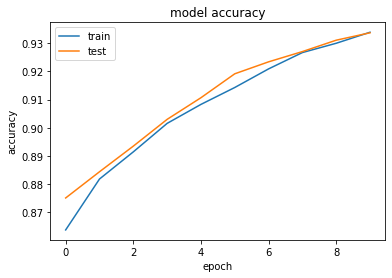

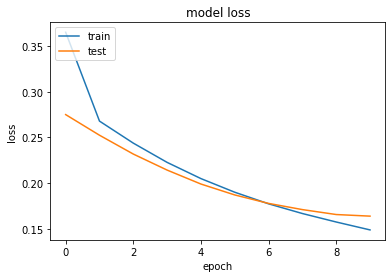

In [ ]:
summarize_model(model, history, train1_padded, train1_labels, test1_padded, test1_labels)

In [ ]:
classification_report(test1_padded, test1_labels)

              precision    recall  f1-score   support

     class 0     0.7434    0.8164    0.7782       795
     class 1     0.9643    0.9462    0.9551      4162

    accuracy                         0.9254      4957
   macro avg     0.8538    0.8813    0.8667      4957
weighted avg     0.9288    0.9254    0.9268      4957



**Fine tune on dataset2**

In [ ]:
model, history = fit_model(train2_padded, train2_labels)

Train on 25686 samples, validate on 8563 samples
Epoch 1/10
25686/25686 [==============================] - 91s 4ms/step - loss: 0.3708 - accuracy: 0.8798 - val_loss: 0.3100 - val_accuracy: 0.8915
Epoch 2/10
25686/25686 [==============================] - 90s 3ms/step - loss: 0.3084 - accuracy: 0.8881 - val_loss: 0.2964 - val_accuracy: 0.8924
Epoch 3/10
25686/25686 [==============================] - 91s 4ms/step - loss: 0.2934 - accuracy: 0.8907 - val_loss: 0.2856 - val_accuracy: 0.8930
Epoch 4/10
25686/25686 [==============================] - 91s 4ms/step - loss: 0.2773 - accuracy: 0.8935 - val_loss: 0.2717 - val_accuracy: 0.8978
Epoch 5/10
25686/25686 [==============================] - 90s 4ms/step - loss: 0.2589 - accuracy: 0.9005 - val_loss: 0.2575 - val_accuracy: 0.9011
Epoch 6/10
25686/25686 [==============================] - 91s 4ms/step - loss: 0.2377 - accuracy: 0.9090 - val_loss: 0.2415 - val_accuracy: 0.9065
Epoch 7/10
25686/25686 [==============================] - 91s 4ms/ste

Train: 0.955, Test: 0.955


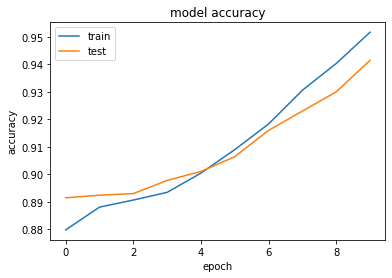

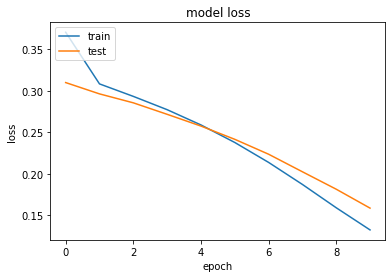

In [ ]:
summarize_model(model, history, train2_padded, train2_labels, test2_padded, test2_labels)

In [ ]:
classification_report(test2_padded, test2_labels)

              precision    recall  f1-score   support

     class 0     0.9585    0.9733    0.9658      7632
     class 1     0.7491    0.6541    0.6984       931

    accuracy                         0.9386      8563
   macro avg     0.8538    0.8137    0.8321      8563
weighted avg     0.9357    0.9386    0.9367      8563



**fix first two layers on dataset1**

In [ ]:
model, history = fix_layer(train1_padded, train1_labels)


Epoch 00010: ReduceLROnPlateau reducing learning rate to 3.000000142492354e-05.


Train: 0.979, Test: 0.979


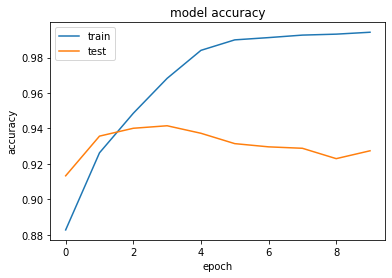

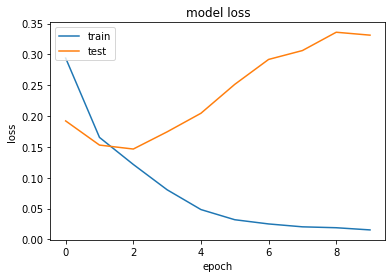

In [ ]:
summarize_model(model, history, train1_padded, train1_labels, test1_padded, test1_labels)

In [ ]:
classification_report(test1_padded, test1_labels)

              precision    recall  f1-score   support

     class 0     0.7989    0.7396    0.7681       795
     class 1     0.9510    0.9644    0.9577      4162

    accuracy                         0.9284      4957
   macro avg     0.8749    0.8520    0.8629      4957
weighted avg     0.9266    0.9284    0.9273      4957



**Fix first two layers on dataset2**

In [ ]:
model, history = fix_layer(train2_padded, train2_labels)

Train: 0.998, Test: 0.998


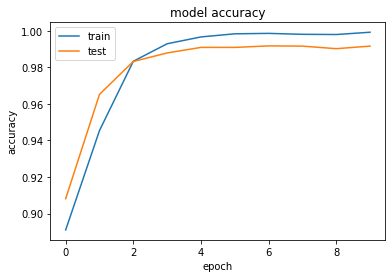

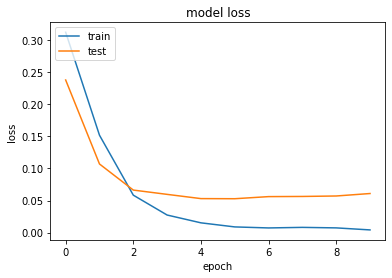

In [ ]:
summarize_model(model, history, train2_padded, train2_labels, test2_padded, test2_labels)

In [ ]:
classification_report(test2_padded, test2_labels)

              precision    recall  f1-score   support

     class 0     0.9941    0.9978    0.9959      7632
     class 1     0.9812    0.9517    0.9662       931

    accuracy                         0.9928      8563
   macro avg     0.9876    0.9747    0.9811      8563
weighted avg     0.9927    0.9928    0.9927      8563

